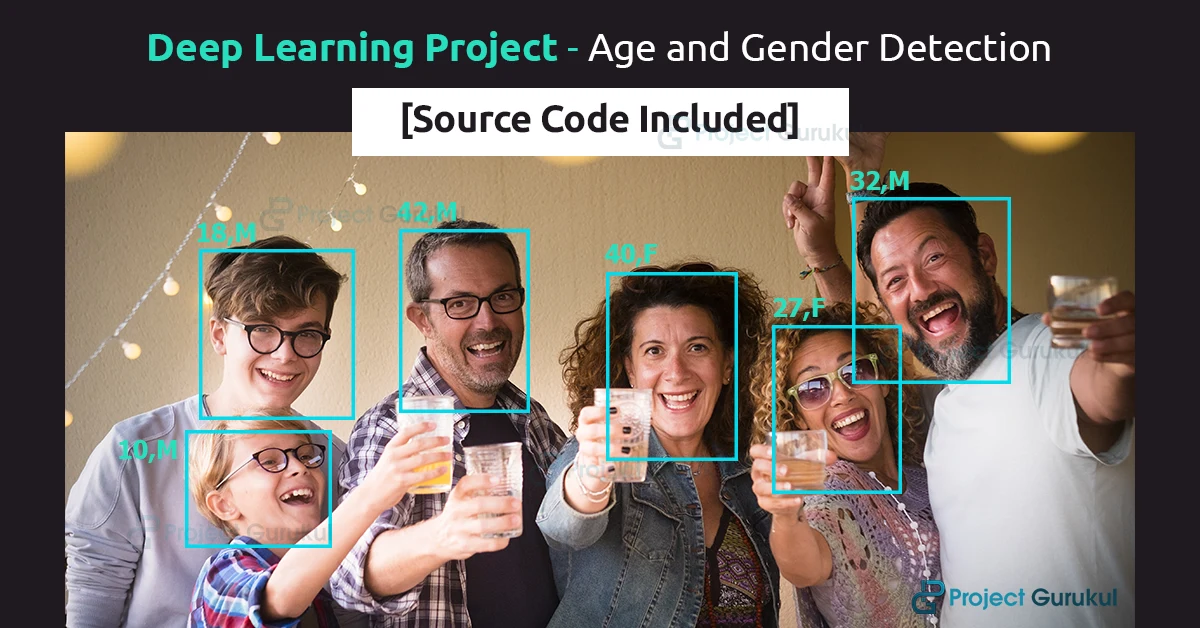

## Overview

UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. The images cover large variation in pose, facial expression, illumination, occlusion, resolution, etc. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, age progression/regression, landmark localization, etc.

## Objective
The objective of this project is to develop a convolutional neural network (CNN) that will work to predict the age and gender of the faces found in this dataset. The accuracy and loss of the CNN model will be analyzed. Lastly, the trained CNN model will work to predict the age and gender on several example images.


### The steps are broadly divided into:


- __Import Libraries__

- __Dataset Summary__

- __Map Gender Labels__

- __Visualization__

- __Feature Extraction__

- __Model Architecture__

- __Compile Model__

- __Train the Model__

- __Image Prediction__

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
#from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input


2023-07-26 16:53:53.490750: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 16:53:54.530086: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Path of Directory where dataset is placed.

In [2]:
BASE_DIR = '/home/umair-pc/notebook/archive/UTKFace'

## Convert dataset into Data Frame

In [3]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)
    

  0%|          | 0/23708 [00:00<?, ?it/s]

In [4]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()


,image,age,gender
0,/home/umair-pc/notebook/archive/UTKFace/59_0_0...,59,0
1,/home/umair-pc/notebook/archive/UTKFace/83_1_0...,83,1
2,/home/umair-pc/notebook/archive/UTKFace/39_1_0...,39,1
3,/home/umair-pc/notebook/archive/UTKFace/35_0_0...,35,0
4,/home/umair-pc/notebook/archive/UTKFace/47_0_1...,47,0


## Summary of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   23708 non-null  object
 1   age     23708 non-null  int64 
 2   gender  23708 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 555.8+ KB


In [6]:
df.describe()

,age,gender
count,23708.000000,23708.000000
mean,33.303484,0.477349
std,19.886112,0.499497
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,116.000000,1.000000


## Mapping Labels for Gender column

In [7]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

## Showing Some image from Dataset

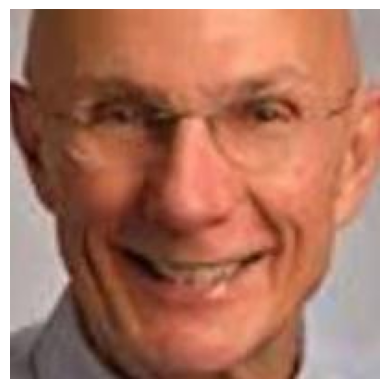

In [8]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);


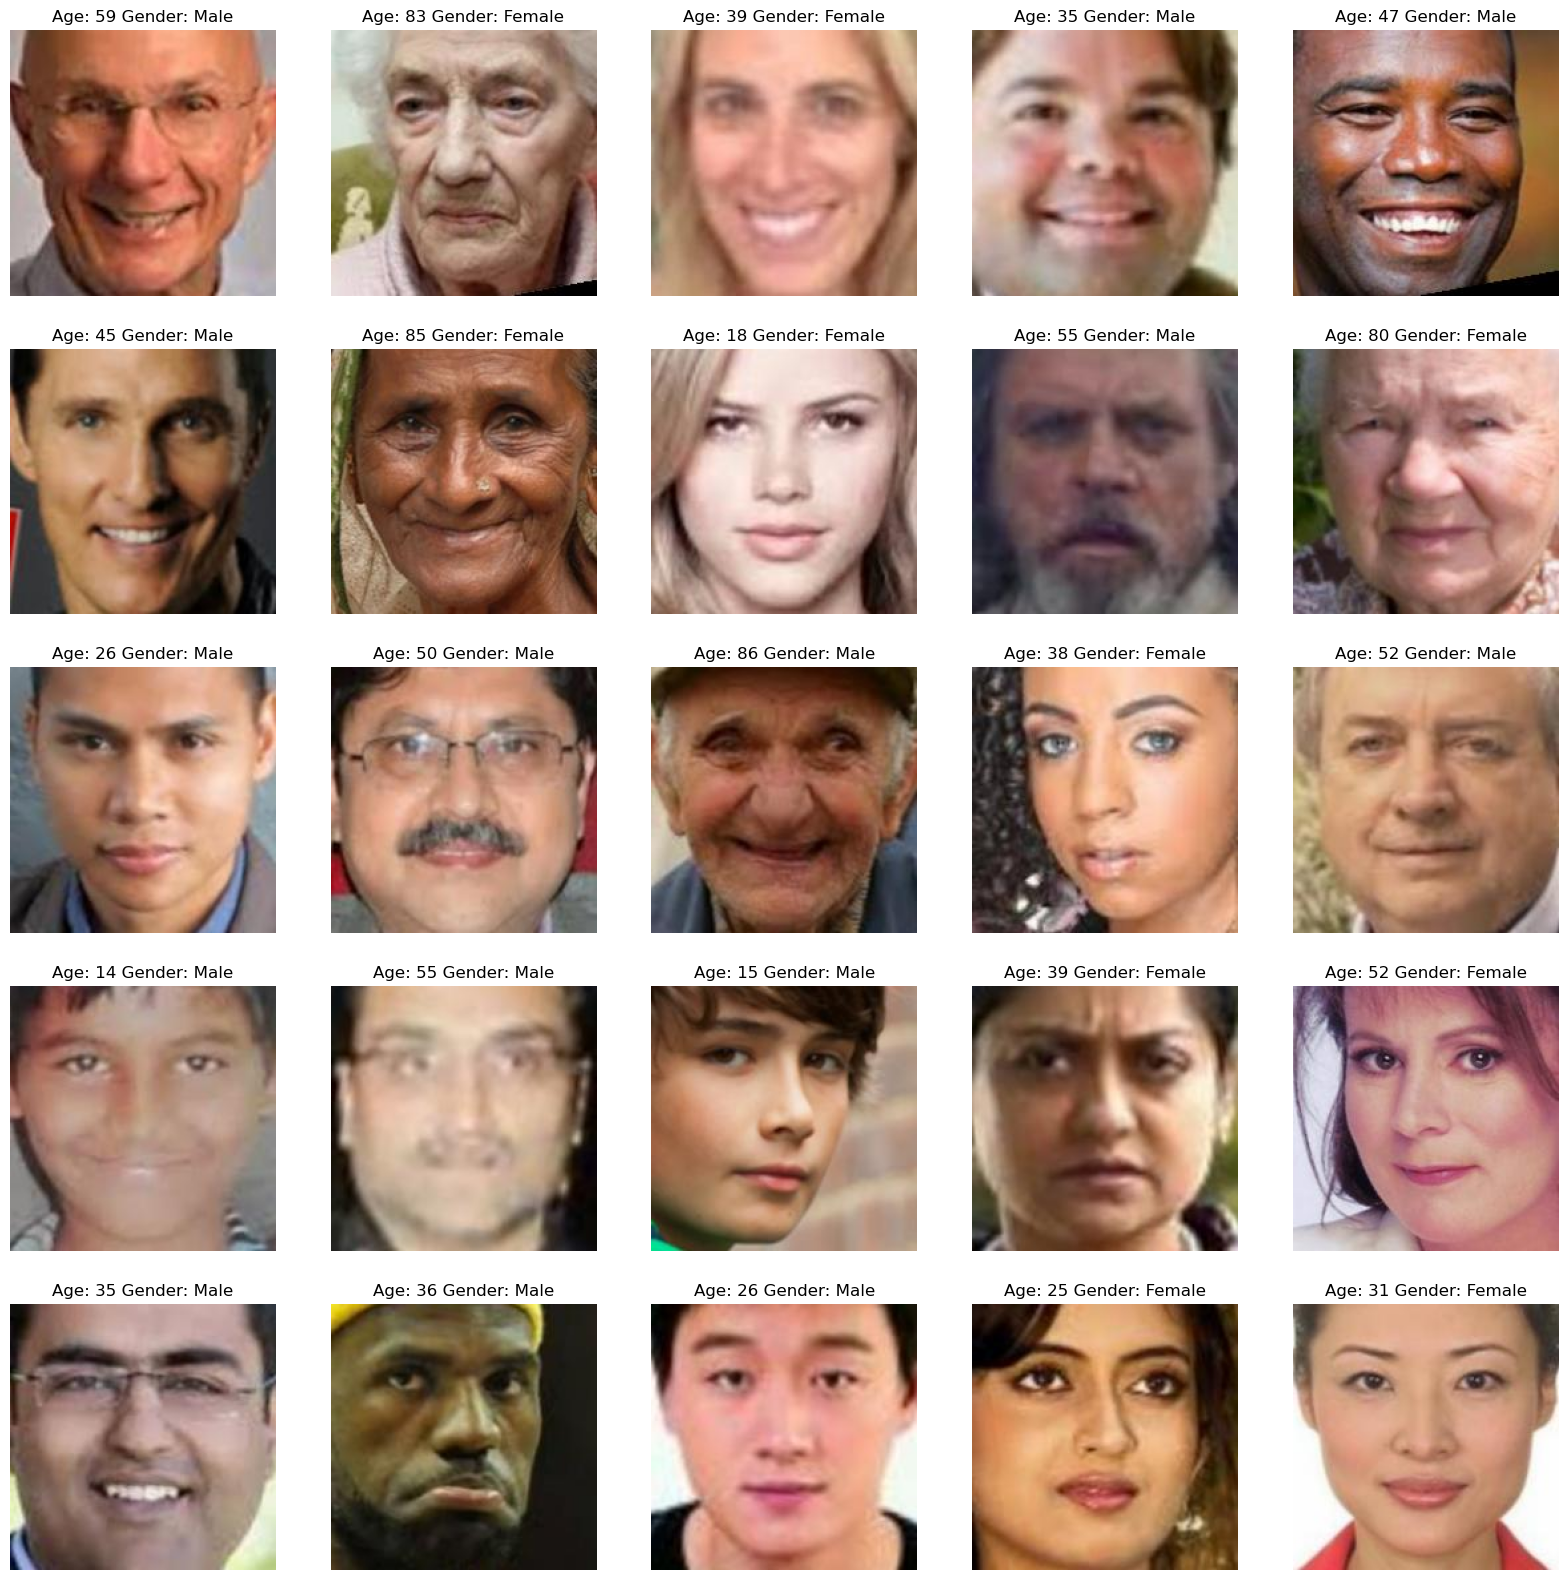

In [9]:
# to display grid of images from Dataset 
plt.figure(figsize=(20, 20))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = Image.open(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

## Visualization

<AxesSubplot:xlabel='gender', ylabel='count'>

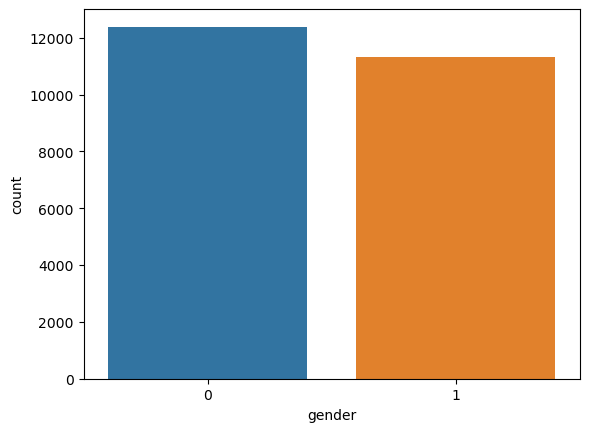

In [10]:
# showing number of males and females in a dataset.
sns.countplot(x=df["gender"])

<AxesSubplot:xlabel='age', ylabel='Count'>

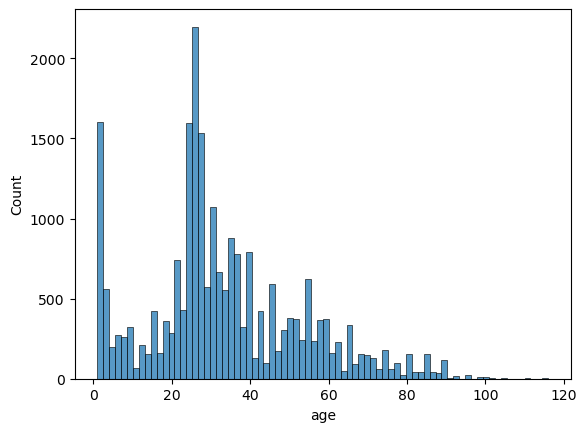

In [11]:
# freuency of ages
sns.histplot(df['age'])

## Featues extraction

In [12]:
# Convert images into numerical features
def extract_features(images):
    features = []
    
    for image in tqdm(images):
        img = Image.open(image)
        img = img.resize((128, 128))
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    
    # ignore this step if using RGB
    #features = features.reshape(len(features), 128, 128, 1)
    
    return features

In [13]:
features = extract_features(df['image'])

# normalize the images
#features = features/255.0

  0%|          | 0/23708 [00:00<?, ?it/s]

In [14]:
features.shape

(23708, 128, 128, 3)

## Target variables which we have to predict

In [15]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

## Model Architecture and Training

### Design a Convolutional Neural Network(CNN) Model

In [16]:
# Define the input shape for the model
inputs = Input(shape=(128,128,3))

# convolutional layers
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# gender layers
dense_1 = Dense(256, activation='relu') (flatten)
dropout_1 = Dropout(0.3) (dense_1)
output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)


# age layers
dense_2 = Dense(256, activation='relu') (flatten)
dropout_2 = Dropout(0.3) (dense_2)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

#Compile a model
model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

2023-07-26 16:54:33.252170: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-26 16:54:33.357121: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### Summary

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 126, 126, 32)         896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 61, 61, 64)           18496     ['max_pooling2d[0][0]']   

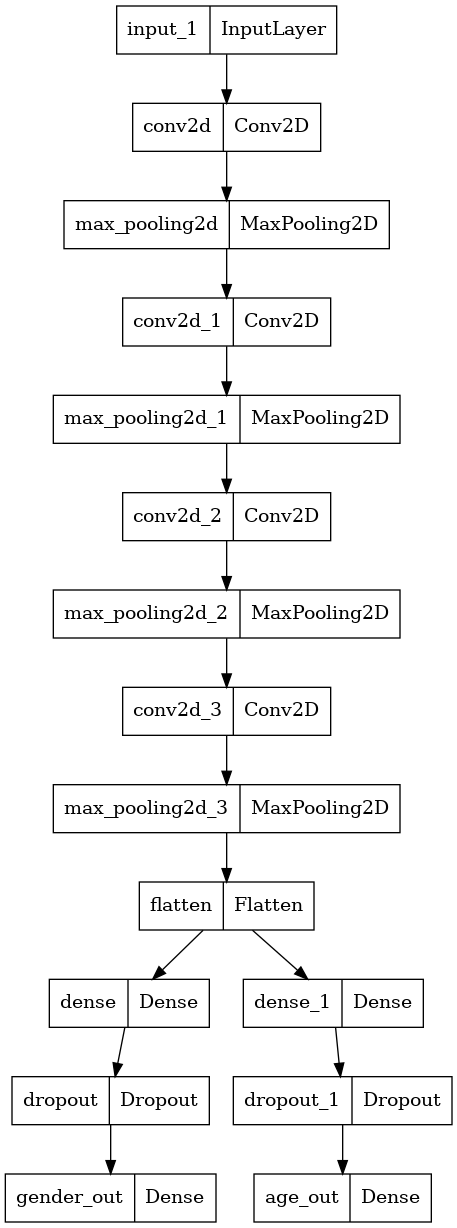

In [18]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

## Training a Model

In [19]:
# train model
history = model.fit(x=features, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30


2023-07-26 16:54:38.353272: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 932216832 exceeds 10% of free system memory.


593/593 [==============================] - 226s 379ms/step - loss: 17.7305 - gender_out_loss: 0.9466 - age_out_loss: 16.7839 - gender_out_accuracy: 0.7111 - age_out_accuracy: 0.0365 - val_loss: 10.5015 - val_gender_out_loss: 0.4428 - val_age_out_loss: 10.0588 - val_gender_out_accuracy: 0.7957 - val_age_out_accuracy: 0.0321
Epoch 2/30
593/593 [==============================] - 223s 376ms/step - loss: 10.7906 - gender_out_loss: 0.4454 - age_out_loss: 10.3452 - gender_out_accuracy: 0.7896 - age_out_accuracy: 0.0257 - val_loss: 9.3588 - val_gender_out_loss: 0.4270 - val_age_out_loss: 8.9318 - val_gender_out_accuracy: 0.8016 - val_age_out_accuracy: 0.0146
Epoch 3/30
593/593 [==============================] - 223s 377ms/step - loss: 9.9620 - gender_out_loss: 0.3994 - age_out_loss: 9.5626 - gender_out_accuracy: 0.8137 - age_out_accuracy: 0.0142 - val_loss: 9.3735 - val_gender_out_loss: 0.3447 - val_age_out_loss: 9.0289 - val_gender_out_accuracy: 0.8383 - val_age_out_accuracy: 0.0150
Epoch 4/3

## Monitor the Training Process by evaluating the model performance on Validation set at regular intervals

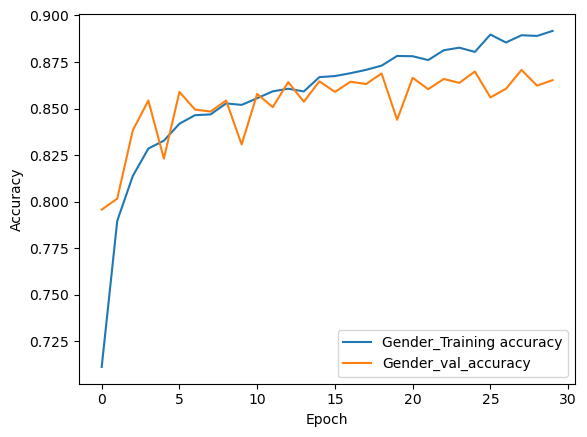

In [144]:
plt.plot(history.history['gender_out_accuracy'], label='Gender_Training accuracy')
plt.plot(history.history['val_gender_out_accuracy'], label = 'Gender_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

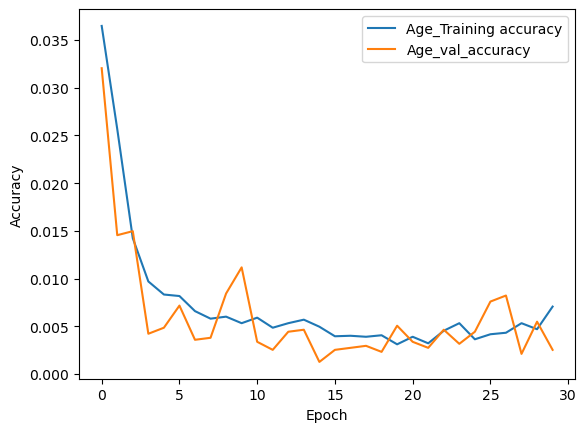

In [145]:
plt.plot(history.history['age_out_accuracy'], label='Age_Training accuracy')
plt.plot(history.history['val_age_out_accuracy'], label = 'Age_val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='upper right')

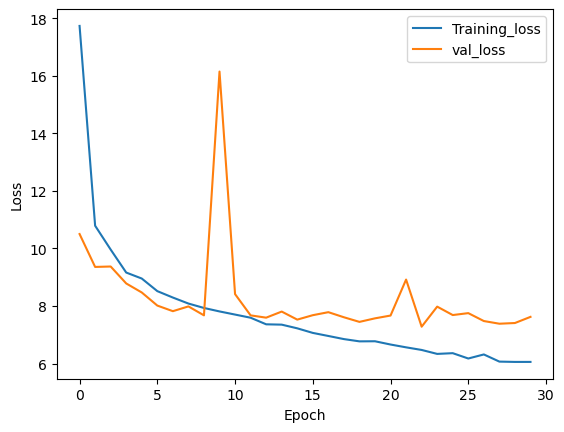

In [146]:
plt.plot(history.history['loss'], label='Training_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

## Save the model

In [147]:
# Save the model to a file
model.save('gender_and_age_prediction_model.h5')

## Prediction on some Images

In [148]:
def get_age(distr):
    if distr >= 0 and distr <= 15:return "0-15"
    if distr >= 16 and distr <= 30:return "16-30"
    if distr >= 31 and distr <= 45:return "31-45"
    if distr >= 46 and distr <= 60:return "46-60"
    if distr >= 61 and distr <= 75:return "61-75"
    if distr >= 76 and distr <= 90:return "76-90"
    if distr >= 91 :return "91+"
    return "Unknown"

In [149]:
def prediction(image_index):
    print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
    
    # predict from model
    pred = model.predict(features[image_index].reshape(1, 128, 128, 3))
    pred_gender = gender_dict[round(pred[0][0][0])]
    pred_age = round(pred[1][0][0])
    print("Predicted Gender:", pred_gender, "Predicted Age:", get_age(pred_age))
    
    # Create a new figure for each image
    plt.figure(figsize=(2, 2))
    plt.axis('off')
    plt.imshow(features[image_index].reshape(128, 128,3))
    plt.show()  # Display the current image


Original Gender: Female Original Age: 39
1/1 [==============================] - 0s 18ms/step
Predicted Gender: Female Predicted Age: 31-45


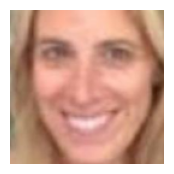

Original Gender: Female Original Age: 23
1/1 [==============================] - 0s 16ms/step
Predicted Gender: Female Predicted Age: 16-30


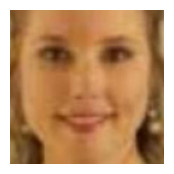

Original Gender: Male Original Age: 23
1/1 [==============================] - 0s 16ms/step
Predicted Gender: Male Predicted Age: 16-30


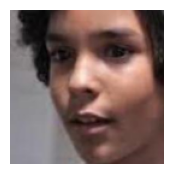

Original Gender: Male Original Age: 27
1/1 [==============================] - 0s 20ms/step
Predicted Gender: Male Predicted Age: 31-45


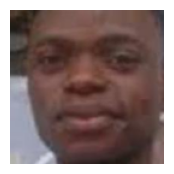

Original Gender: Female Original Age: 18
1/1 [==============================] - 0s 20ms/step
Predicted Gender: Female Predicted Age: 16-30


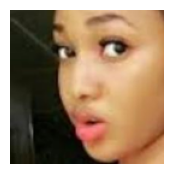

Original Gender: Female Original Age: 32
1/1 [==============================] - 0s 17ms/step
Predicted Gender: Female Predicted Age: 31-45


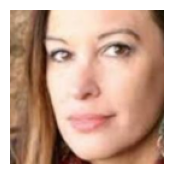

Original Gender: Male Original Age: 45
1/1 [==============================] - 0s 17ms/step
Predicted Gender: Male Predicted Age: 31-45


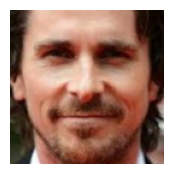

Original Gender: Female Original Age: 26
1/1 [==============================] - 0s 20ms/step
Predicted Gender: Female Predicted Age: 31-45


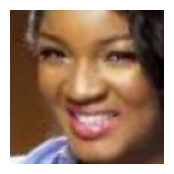

In [150]:
idx = [2,100,3000,2345,2346,10000,23400,1256]
for index in idx:
    prediction(index)